Jesse Cook
1/17/19
Phsx 218

# Plotting Code

To do equations, surround it in \$.

$\frac{a}{b}$ = \frac{a}{b}

$\sqrt{a}$ = \sqrt{a}

$\alpha \beta$ = \alpha \beta

$\alpha = \frac{\Delta L}{L \Delta T}$

[ 0.1    0.12   0.11   0.13   0.15   0.13   0.11   0.165  0.315  0.285
  0.765  0.29 ]


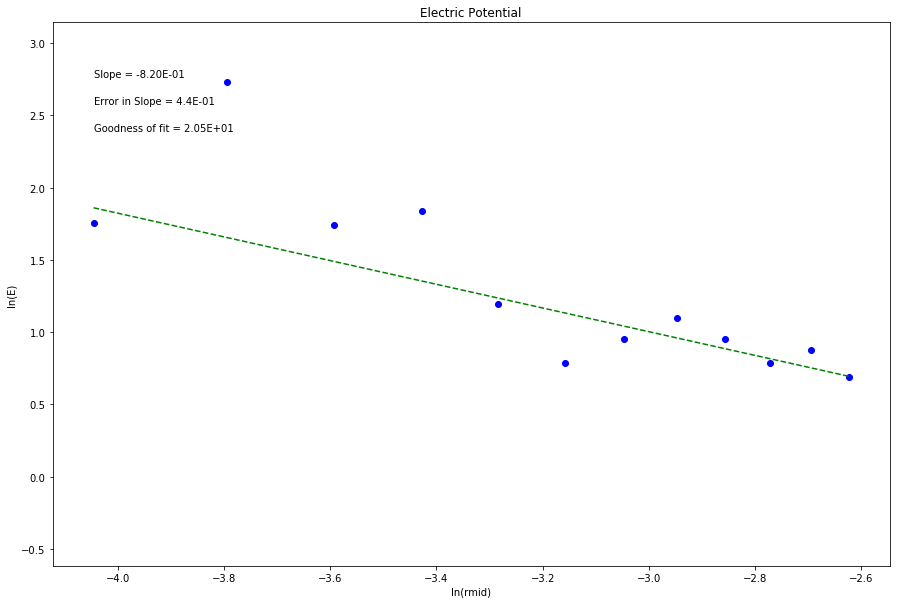

In [22]:
#functions and imports
import numpy as np
import matplotlib.pyplot as plt

def rule3(dA,dB,dC=0.0,dD=0.0,dE=0.0,dF=0.0,dG=0.0,dH=0.0,dI=0.0):
    return np.sqrt(dA**2+dB**2+dC**2+dD**2+dE**2+dF**2+dG**2+dH**2+dI**2)

def rule4(value,A,dA,B,dB,C=1.0,dC=0.0,D=1.0,dD=0.0,E=1.0,dE=0.0,F=1.0,dF=0.0,G=1.0,dG=0.0,H=1.0,dH=0.0,I=1.0,dI=0.0):
    return value*np.sqrt((dA/A)**2+(dB/B)**2+(dC/C)**2+(dD/D)**2+(dE/E)**2+(dF/F)**2+(dG/G)**2+(dH/H)**2+(dI/I)**2)

r = np.array([0.075,0.07,0.065,0.06,0.055,0.05,0.045,0.04,0.035,0.03,0.025,0.02,0.015])

v1 = np.array([7.09,6.99,6.87,6.76,6.63,6.48,6.350,6.240,6.075,5.760,5.475,4.710,4.42])

def mid(array,mid=False):
    resultarray = []
    for i in range(1,len(array)):
        if mid:
            resultarray.append(abs((array[i]+array[i-1])/2.0))
        else:
            resultarray.append(abs(array[i]-array[i-1]))
    return np.array(resultarray)

DeltaV1 = mid(v1)
print(DeltaV1)

DeltaR = 0.05

Rmid1 = mid(r,True)

E1 = DeltaV1/DeltaR

y=np.log(E1)
x=np.log(Rmid1)

dv = 0.15

dR = 0.0005

dE1 = rule4(E1,DeltaV1,np.sqrt(2)*dv,DeltaR,dR)

dy=np.log(E1+dE1)-np.log(E1)

#Jaylene's Plotting Code
#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('ln(rmid)')
plt.ylabel('ln(E)')
plt.title('Electric Potential')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()


